# Imports

In [ ]:
import numpy as np
import pandas as pd
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Add the parent folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.feature_engineering import get_famtype, extract_title, extract_deck

ImportError: cannot import name 'get_famtype' from 'src.feature_engineering' (c:\Users\manue\Dokumente\Data Science\Projekte\titanic-survival-prediction\src\feature_engineering.py)

# Load Data

In [2]:
train_data = pd.read_csv("../data/raw/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../data/raw/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Create copies and separate targets from features
titanic_train = train_data.copy()
titanic_train_target = titanic_train["Survived"]
titanic_train = train_data.drop("Survived", axis=1)

titanic_test = test_data.copy()

# Feature Engineering

### Create new features "FamType" & "Title"

In [7]:
titanic_train = get_famtype(titanic_train)
titanic_train = extract_title(titanic_train)
titanic_train = extract_deck(titanic_train)
titanic_train["AgeBin"] = pd.cut(titanic_train["Age"], bins=[0,12,18,60,100], labels=["Child","Teen","Adult","Senior"])

titanic_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize,FamType,Title,Deck,AgeBin
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,2,Small,Mr,Unknown,Adult
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,2,Small,Mrs,C,Adult
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Solo,Miss,Unknown,Adult
3,4,1,female,35.0,1,0,113803,53.1000,S,2,Small,Mrs,C,Adult
4,5,3,male,35.0,0,0,373450,8.0500,S,1,Solo,Mr,Unknown,Adult


In [8]:
titanic_test = get_famtype(titanic_test)
titanic_test = extract_title(titanic_test)
titanic_test = extract_deck(titanic_test)
titanic_test["AgeBin"] = pd.cut(titanic_test["Age"], bins=[0,12,18,60,100], labels=["Child","Teen","Adult","Senior"])

titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamSize,FamType,Title,Deck,AgeBin
0,892,3,male,34.5,0,0,330911,7.8292,Q,1,Solo,Mr,Unknown,Adult
1,893,3,female,47.0,1,0,363272,7.0000,S,2,Small,Mrs,Unknown,Adult
2,894,2,male,62.0,0,0,240276,9.6875,Q,1,Solo,Mr,Unknown,Senior
3,895,3,male,27.0,0,0,315154,8.6625,S,1,Solo,Mr,Unknown,Adult
4,896,3,female,22.0,1,1,3101298,12.2875,S,3,Small,Mrs,Unknown,Adult


# Data Exploration

### Missing Values and Data Types

In [10]:
describe_dataframe(titanic_train)

,Missing Count,Missing Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,891,1,int64,Numerical
Pclass,0,0.000000,3,3,int64,Categorical
Sex,0,0.000000,2,male,object,Categorical
Age,177,0.198653,88,24.0,float64,Numerical
SibSp,0,0.000000,7,0,int64,Categorical
Parch,0,0.000000,7,0,int64,Categorical
Ticket,0,0.000000,681,1601,object,Categorical
Fare,0,0.000000,248,8.05,float64,Numerical
Embarked,2,0.002245,3,S,object,Categorical
FamSize,0,0.000000,9,1,int64,Categorical


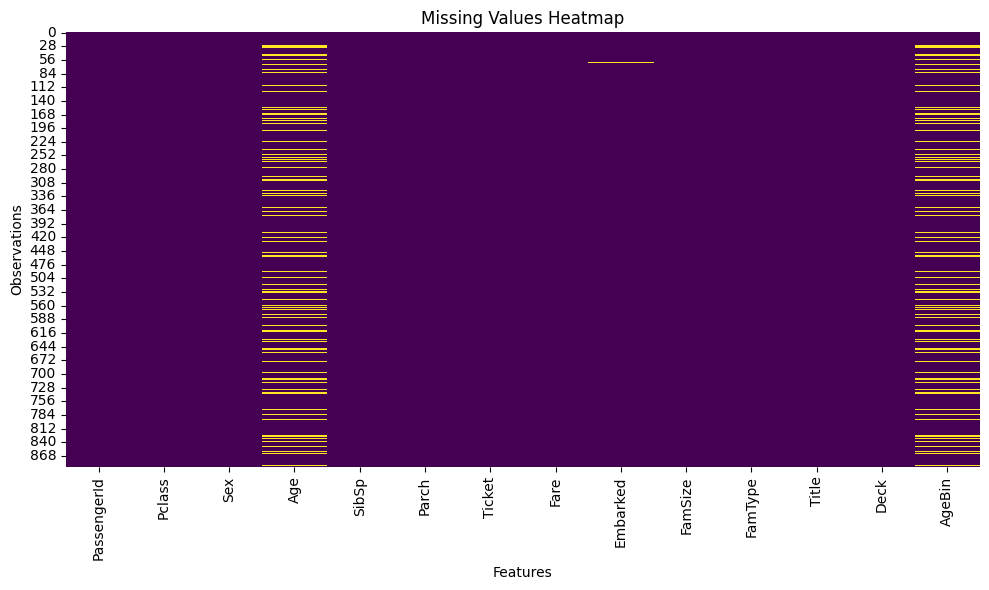

In [11]:
plot_missing_values(titanic_train)

### Target Distribution

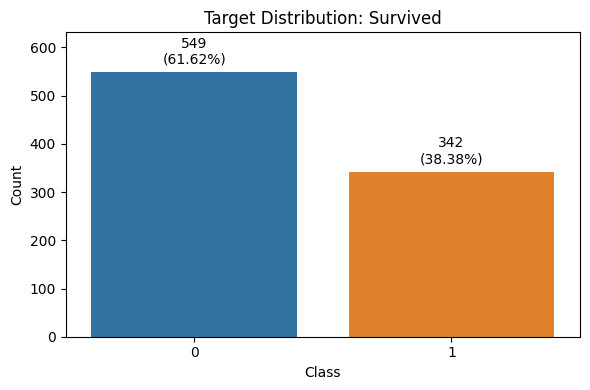

In [13]:
plot_binary_target_with_stats(titanic_train_target, target_col="Survived", class_labels={0: "Alive", 1: "Dead"})


### Feature Distributions

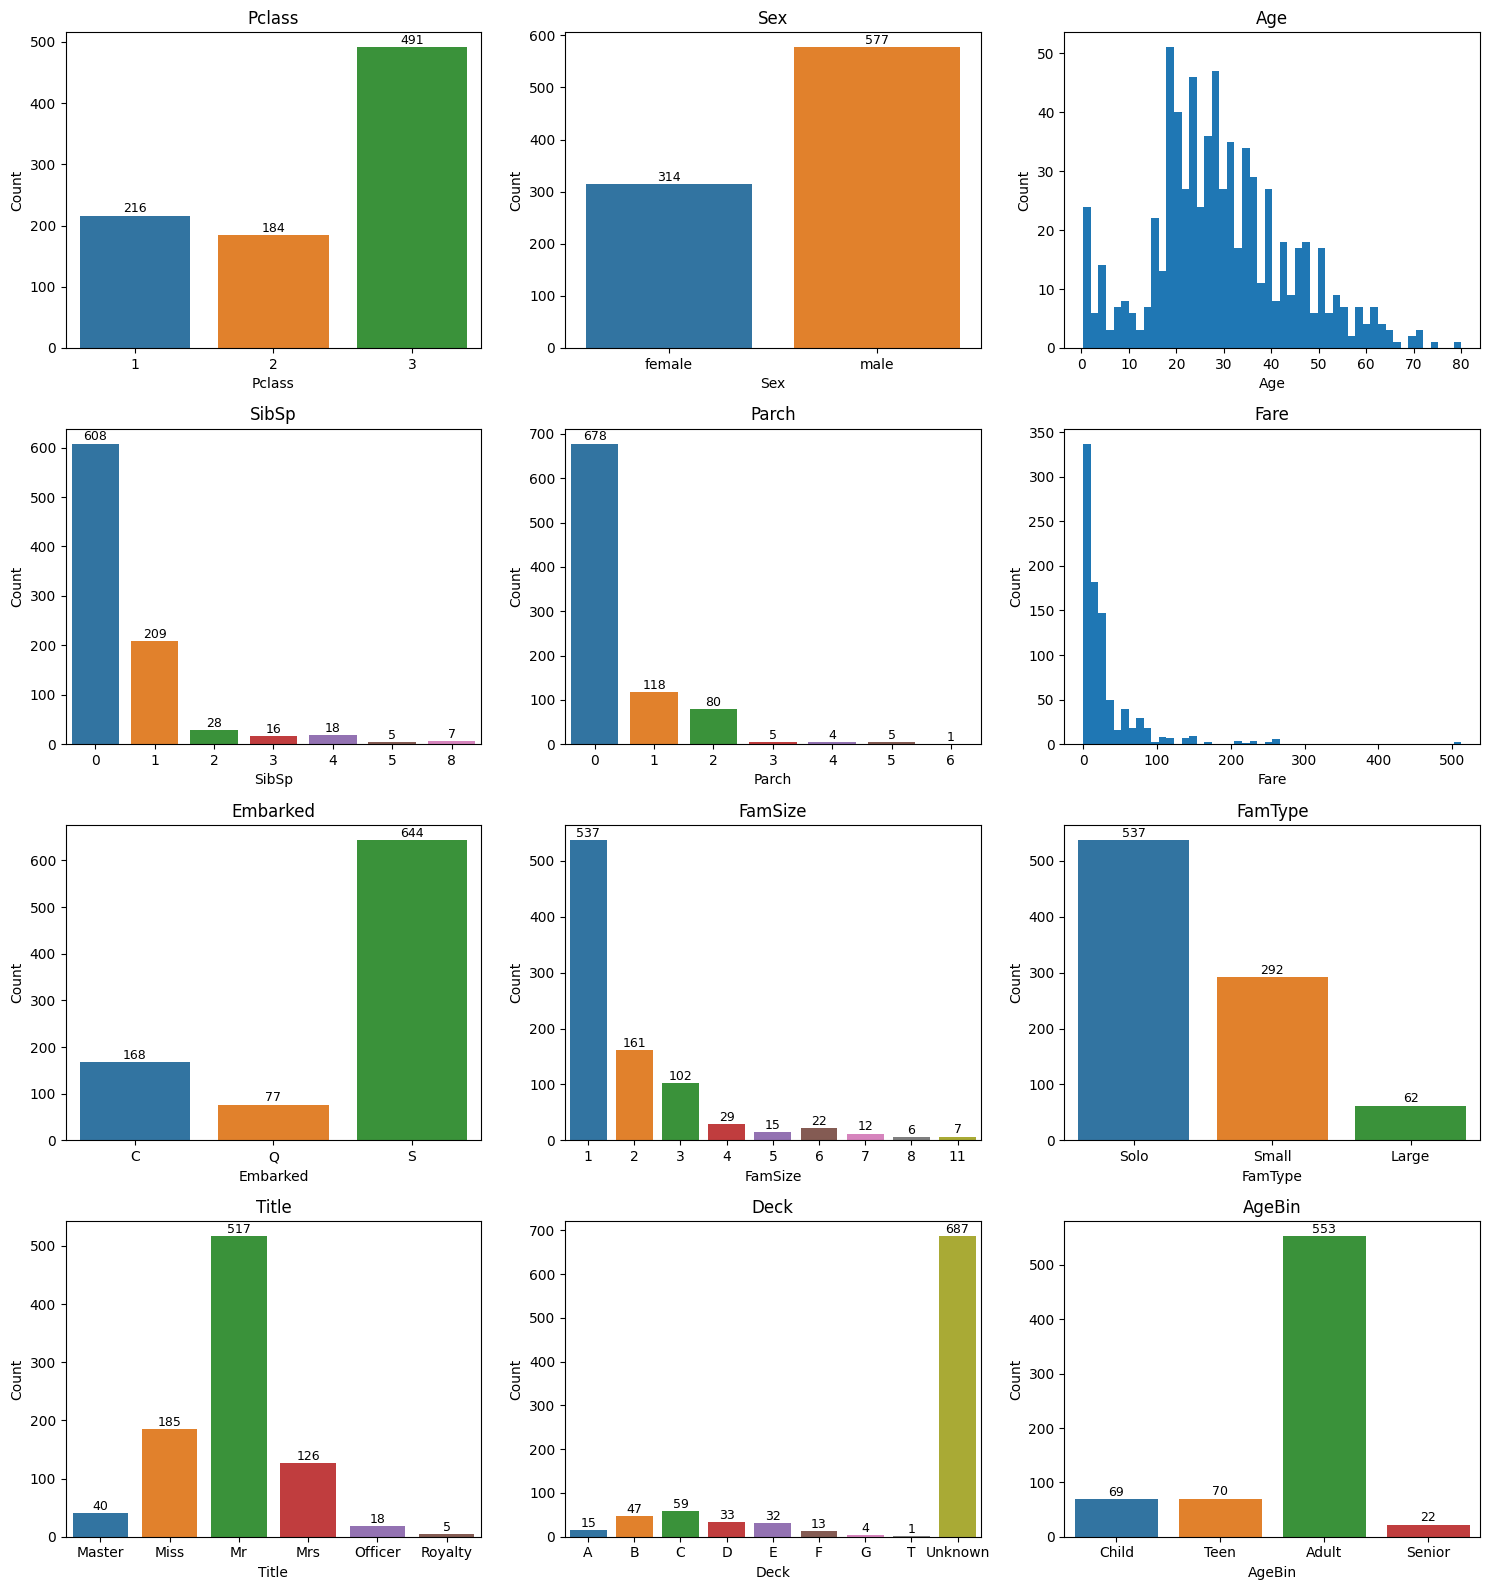

In [15]:
show_feature_distributions(
    titanic_train,
    titanic_train.columns,
    n_cols=3,
    cat_max_unique=10,
    exclude_cols=["PassengerId"]
)

### Survival Rate per Feature

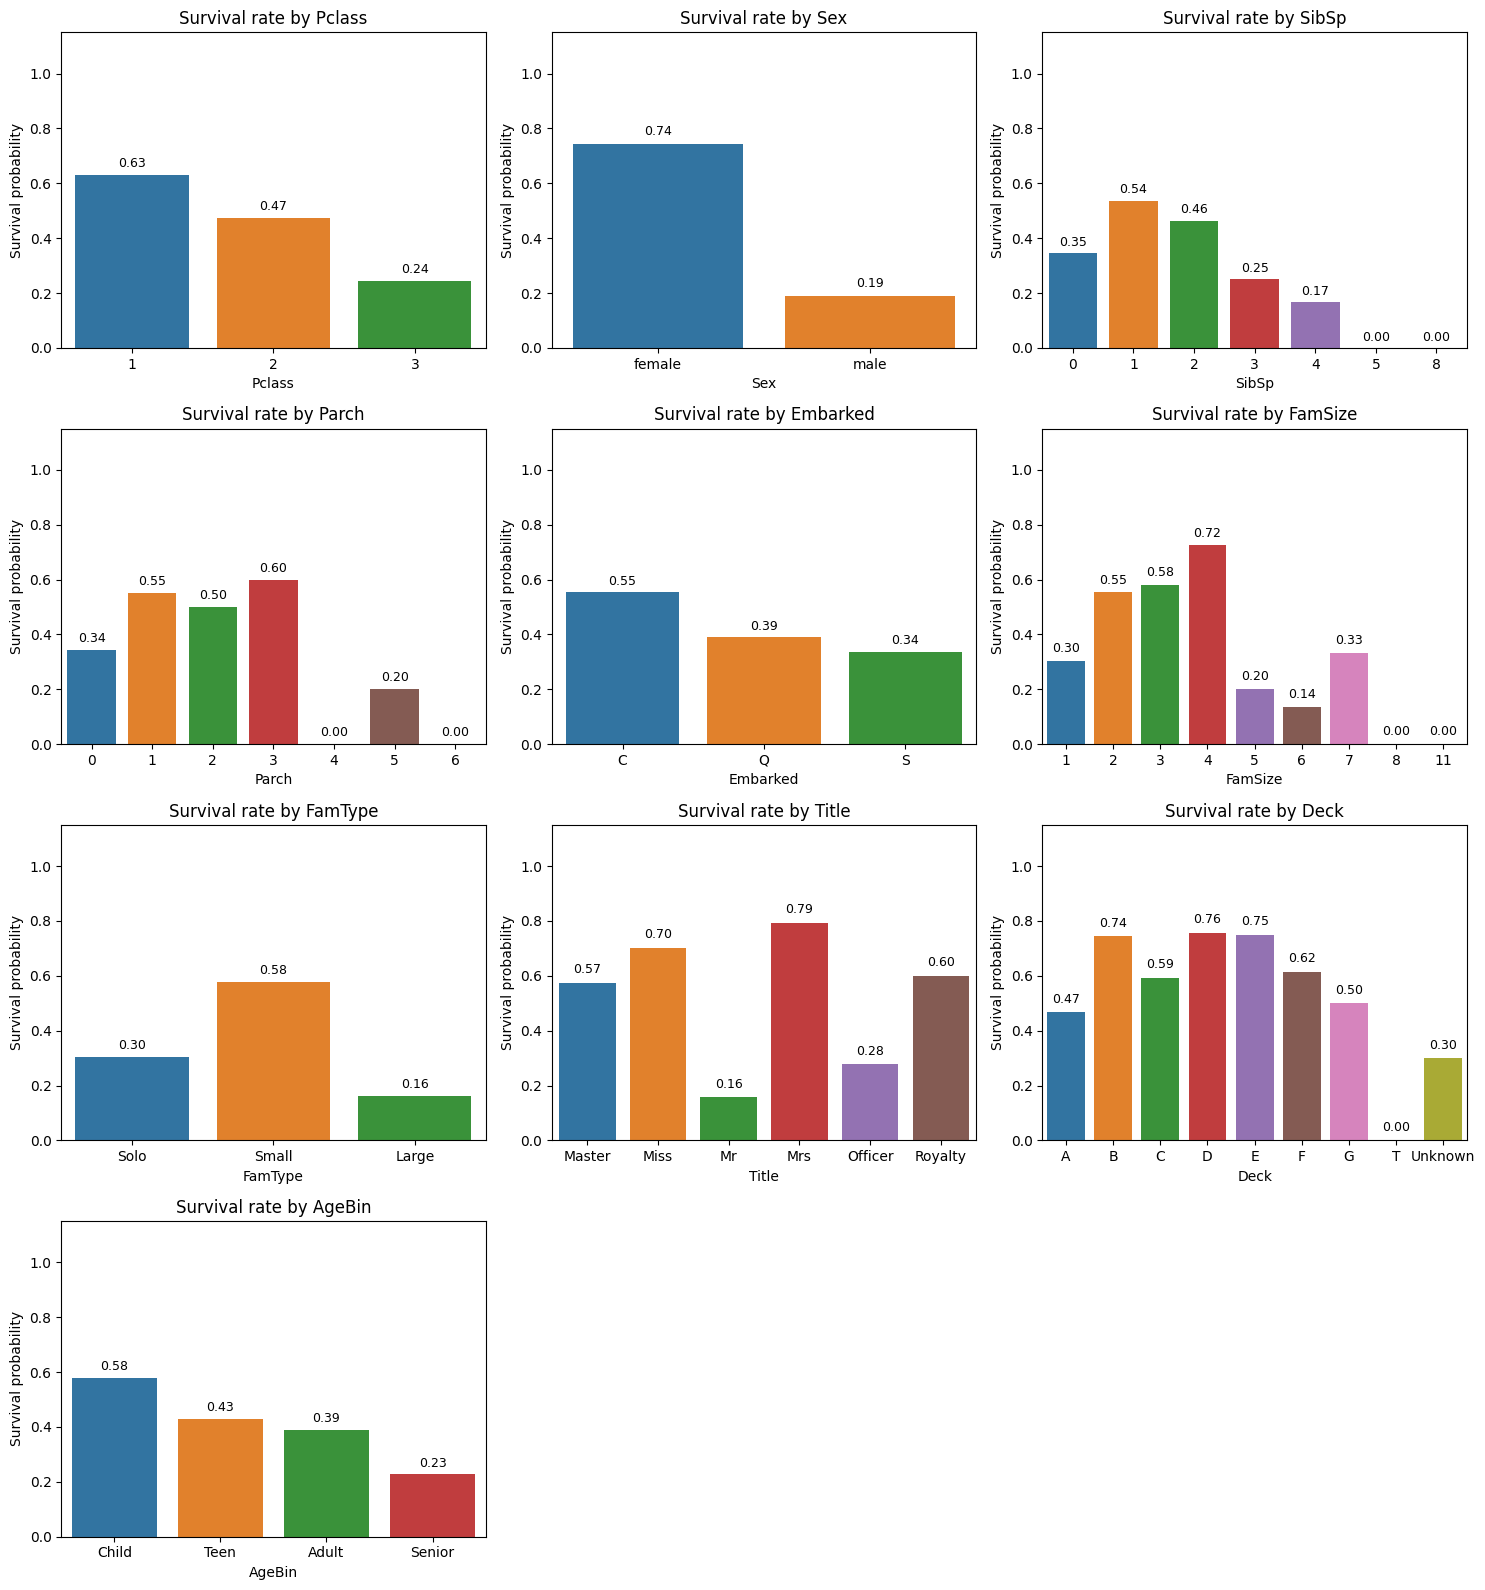

In [17]:
plot_survival_rate_categorical(
    titanic_train,
    titanic_train_target,
    exclude_cols=["PassengerId", "Ticket", "Cabin"]
)

# Data Preprocessing Pipeline

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

titanic = titanic_train # _data.drop("Survived", axis=1)
titanic_labels = titanic_train_target # _data["Survived"].copy()

# num_attr = ["Age", "Fare"]
cat_attr = ["Pclass", "Sex", "Embarked", "FamType", "Title", "Deck"] # PassengerId, Ticket, Cabin

# num_pipeline = make_pipeline(
#     SimpleImputer(strategy="median"),
#     StandardScaler(),
# )

age_pipeline = make_pipeline(
    GroupMedianImputer(
        group_cols=["Sex", "Pclass", "Title"],
        target_col="Age"
    ),
    StandardScaler()
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler(),
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessing = ColumnTransformer([
    ("age", age_pipeline, ["Age", "Sex", "Pclass", "Title"]),
    ("log", log_pipeline, ["Fare"]),
    ("cat", cat_pipeline, cat_attr),
])

# rbf

titanic_prepared = preprocessing.fit_transform(titanic)
titanic_prepared.shape # .toarray()

(891, 28)

### Features

In [30]:
print("Features in: \n", preprocessing.feature_names_in_)
print("\nFeatures out: \n", preprocessing.get_feature_names_out())

Features in: 
 ['PassengerId' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Embarked' 'FamSize' 'FamType' 'Title' 'Deck' 'AgeBin']

Features out: 
 ['age__Age' 'log__Fare' 'cat__Pclass_1' 'cat__Pclass_2' 'cat__Pclass_3'
 'cat__Sex_female' 'cat__Sex_male' 'cat__Embarked_C' 'cat__Embarked_Q'
 'cat__Embarked_S' 'cat__FamType_Large' 'cat__FamType_Small'
 'cat__FamType_Solo' 'cat__Title_Master' 'cat__Title_Miss' 'cat__Title_Mr'
 'cat__Title_Mrs' 'cat__Title_Officer' 'cat__Title_Royalty' 'cat__Deck_A'
 'cat__Deck_B' 'cat__Deck_C' 'cat__Deck_D' 'cat__Deck_E' 'cat__Deck_F'
 'cat__Deck_G' 'cat__Deck_T' 'cat__Deck_Unknown']


### Pipeline Visualization

In [31]:
import sklearn
sklearn.set_config(display="diagram")
preprocessing

ColumnTransformer(transformers=[('age',
                                 Pipeline(steps=[('groupmedianimputer',
                                                  GroupMedianImputer(group_cols=['Sex',
                                                                                 'Pclass',
                                                                                 'Title'])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Sex', 'Pclass', 'Title']),
                                ('log',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked', 'FamType',
                                  'Title', 'Deck'])])